In [1]:
# import needed modules
import pandas as pd
import numpy as np
import os, itertools
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sn
import random
from tqdm import tqdm

# to plot better figures
plt.tight_layout()

# defining utils functions
def agg_samples(x):
    '''
    Function to aggregate samples feature in the groupby operation
    merging all samples from the same event mapping onto a position
    into a unique list of float values 
    '''
    final = list( map(float, ",".join(x).split(",")))
    #final = ""
    #for e in x:
        #final += e
        #final += ","
        #final_list = final.rstrip(",").split(",")
        #final_map = list(map(float, final_list))
    return final

def collapse_eventalign(eventalign_filepath):
    '''
    Function to collapse on contig-position-ref_kmer-read_name the events from
    an eventalign file.
    '''
    df = pd.read_table(eventalign_filepath)
    # removing rows with NNNNNN model_kmer
    df = df[df["model_kmer"] != "NNNNNN"]
    df = df.groupby(["contig", "position", "reference_kmer", "read_name"]).agg({"samples":[agg_samples]})
    # resetting index and columns' names
    df = df.reset_index()
    df.columns = df.columns.droplevel(-1)
    df["event_level_mean"] = df["samples"].apply(np.mean)
    df["event_level_std"] = df["samples"].apply(np.std)
    df["dwell"] = df["samples"].apply(len).values
    df.drop("samples", axis=1, inplace=True)
    df.sort_values(["contig", "read_name"], inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

<Figure size 432x288 with 0 Axes>

### Ribo1C

In [2]:
# defining input paths for both dna and ribo
dna_rev_filepath = "/lustre/bio_running/DNA_Ribo_2023/DNA_only_new/f5c_eval_wflags/DNA_only_new.eventalign.rev_strand"
ribo_rev_filepath = "/lustre/bio_running/DNA_Ribo_2023/RIBO1C/f5c_eval_wflags/RIBO1C.eventalign.rev_strand"

In [3]:
# dna (ribo1c sites)
# detect n events and create a set of reads
input_eventalign = dna_rev_filepath
n_events = 0
reads = set()
reads_to_take = 10000
with open(input_eventalign) as ev:
    for l in ev:
        if not l.startswith("contig"):
            n_events += 1
            line = l.rstrip().split("\t")
            read_name = line[3]
            reads.add(read_name)
            
print("N events detected:", n_events)
print("N reads detected:", len(reads))
print("Performing random reads downsampling...")

reads = random.sample(reads, reads_to_take)
print("N reads after downsampling", len(reads))

sites = [4992, 4998, 5008] # 0-based
output = input_eventalign + ".ribo1c.downsampled.roi"

print("Downsampling original eventalign file focusing on R.O.I...")
with open(output, "w") as out:
    with tqdm(total=n_events) as pbar:
        with open(input_eventalign) as ev:
            for l in ev:
                if l.startswith("contig"):
                    out.write(l)
                else:
                    line = l.rstrip().split("\t")
                    if int(line[1]) in sites and line[3] in reads:
                        out.write(l)
                    pbar.update(1)
print("Output file:", output)
print("Computation Finished.")

N events detected: 141016437
N reads detected: 1255472
Performing random reads downsampling...
N reads after downsampling 10000
Downsampling original eventalign file focusing on R.O.I...


 15%|█▌        | 21324357/141016437 [05:15<29:39, 67254.79it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 96%|█████████▌| 135564123/141016437 [32:41<01:04, 83929.91it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
# ribo1c
# detect n events and create a set of reads
input_eventalign = ribo_rev_filepath
n_events = 0
reads = set()
reads_to_take = 10000
with open(input_eventalign) as ev:
    for l in ev:
        if not l.startswith("contig"):
            n_events += 1
            line = l.rstrip().split("\t")
            read_name = line[3]
            reads.add(read_name)
            
print("N events detected:", n_events)
print("N reads detected:", len(reads))
print("Performing random reads downsampling...")

reads = random.sample(reads, reads_to_take)
print("N reads after downsampling", len(reads))

sites = [4992, 4998, 5008] # 0-based
output = input_eventalign + ".downsampled.roi"

print("Downsampling original eventalign file focusing on R.O.I...")
with open(output, "w") as out:
    with tqdm(total=n_events) as pbar:
        with open(input_eventalign) as ev:
            for l in ev:
                if l.startswith("contig"):
                    out.write(l)
                else:
                    line = l.rstrip().split("\t")
                    if int(line[1]) in sites and line[3] in reads:
                        out.write(l)
                    pbar.update(1)
print("Output file:", output)
print("Computation Finished.")

N events detected: 132710056
N reads detected: 1151354
Performing random reads downsampling...
N reads after downsampling 10000
Downsampling original eventalign file focusing on R.O.I...


  7%|▋         | 9005869/132710056 [05:54<1:25:45, 24041.68it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 132710056/132710056 [1:13:46<00:00, 29982.67it/s]

Output file: /lustre/bio_running/DNA_Ribo_2023/RIBO1C/f5c_eval_wflags/RIBO1C.eventalign.rev_strand.downsampled.roi
Computation Finished.


In [5]:
# loading downsampled eventalign table into dataframes and collapsing their events (dna)
dna_rev = collapse_eventalign(dna_rev_filepath+".ribo1c.downsampled.roi")
dna_rev

,contig,position,reference_kmer,read_name,event_level_mean,event_level_std,dwell
0,M13mp18,4992,CGCGCA,00046ab2-a826-4168-a45c-1aedb540db77,94.828308,1.833814,13
1,M13mp18,4998,TTAAAG,00046ab2-a826-4168-a45c-1aedb540db77,100.292200,1.597808,4
2,M13mp18,5008,ATAGCC,00046ab2-a826-4168-a45c-1aedb540db77,94.527755,2.095942,11
3,M13mp18,4992,CGCGCA,0006f906-0472-4237-95ea-1fccab663392,93.921628,1.698862,18
4,M13mp18,4998,TTAAAG,0006f906-0472-4237-95ea-1fccab663392,98.595217,1.296829,6
...,...,...,...,...,...,...,...
26919,M13mp18,4992,CGCGCA,fff3b853-261a-41df-9e34-86ff984c5690,91.695867,2.594055,3
26920,M13mp18,4998,TTAAAG,fff3b853-261a-41df-9e34-86ff984c5690,98.835308,1.044099,13
26921,M13mp18,5008,ATAGCC,fff3b853-261a-41df-9e34-86ff984c5690,95.996760,1.030996,5
26922,M13mp18,4992,CGCGCA,fffaf226-079e-4faa-9d1d-1438dfd9f05d,93.952000,0.317590,3


In [6]:
# ribo
ribo_rev = collapse_eventalign(ribo_rev_filepath+".downsampled.roi")
ribo_rev

,contig,position,reference_kmer,read_name,event_level_mean,event_level_std,dwell
0,M13mp18,4998,TTAAAG,00098585-7c0f-4999-b946-2bc129adb6cf,98.583300,0.580915,3
1,M13mp18,4998,TTAAAG,0009e78b-f545-4392-b7c5-2aef81421f31,101.752690,2.846634,10
2,M13mp18,4992,CGCGCA,00210489-35bc-4634-8386-80c8b927a258,94.481179,3.265804,24
3,M13mp18,4998,TTAAAG,00210489-35bc-4634-8386-80c8b927a258,99.968541,1.898214,27
4,M13mp18,4992,CGCGCA,002b456e-2753-4fb2-8550-332b2529058d,91.929321,1.168840,14
...,...,...,...,...,...,...,...
21874,M13mp18,4992,CGCGCA,ffd48def-318a-488d-8435-9d5601dfb170,94.258489,1.146911,18
21875,M13mp18,4998,TTAAAG,ffd48def-318a-488d-8435-9d5601dfb170,96.870788,2.081805,8
21876,M13mp18,5008,ATAGCC,ffd48def-318a-488d-8435-9d5601dfb170,94.116709,0.861163,11
21877,M13mp18,4992,CGCGCA,ffe3c7fe-2928-424f-b6a1-773e333d88c0,96.806300,3.594002,10


In [7]:
# save collaped downsampled tables
dna_rev.to_csv(dna_rev_filepath+".ribo1c.downsampled.roi"+".collapsed", sep="\t", index=None)
ribo_rev.to_csv(ribo_rev_filepath+".downsampled.roi"+".collapsed", sep="\t", index=None)

In [8]:
# convert to 1-based
dna_rev["position"] += 1
dna_rev

,contig,position,reference_kmer,read_name,event_level_mean,event_level_std,dwell
0,M13mp18,4993,CGCGCA,00046ab2-a826-4168-a45c-1aedb540db77,94.828308,1.833814,13
1,M13mp18,4999,TTAAAG,00046ab2-a826-4168-a45c-1aedb540db77,100.292200,1.597808,4
2,M13mp18,5009,ATAGCC,00046ab2-a826-4168-a45c-1aedb540db77,94.527755,2.095942,11
3,M13mp18,4993,CGCGCA,0006f906-0472-4237-95ea-1fccab663392,93.921628,1.698862,18
4,M13mp18,4999,TTAAAG,0006f906-0472-4237-95ea-1fccab663392,98.595217,1.296829,6
...,...,...,...,...,...,...,...
26919,M13mp18,4993,CGCGCA,fff3b853-261a-41df-9e34-86ff984c5690,91.695867,2.594055,3
26920,M13mp18,4999,TTAAAG,fff3b853-261a-41df-9e34-86ff984c5690,98.835308,1.044099,13
26921,M13mp18,5009,ATAGCC,fff3b853-261a-41df-9e34-86ff984c5690,95.996760,1.030996,5
26922,M13mp18,4993,CGCGCA,fffaf226-079e-4faa-9d1d-1438dfd9f05d,93.952000,0.317590,3


In [9]:
ribo_rev["position"] += 1
ribo_rev

,contig,position,reference_kmer,read_name,event_level_mean,event_level_std,dwell
0,M13mp18,4999,TTAAAG,00098585-7c0f-4999-b946-2bc129adb6cf,98.583300,0.580915,3
1,M13mp18,4999,TTAAAG,0009e78b-f545-4392-b7c5-2aef81421f31,101.752690,2.846634,10
2,M13mp18,4993,CGCGCA,00210489-35bc-4634-8386-80c8b927a258,94.481179,3.265804,24
3,M13mp18,4999,TTAAAG,00210489-35bc-4634-8386-80c8b927a258,99.968541,1.898214,27
4,M13mp18,4993,CGCGCA,002b456e-2753-4fb2-8550-332b2529058d,91.929321,1.168840,14
...,...,...,...,...,...,...,...
21874,M13mp18,4993,CGCGCA,ffd48def-318a-488d-8435-9d5601dfb170,94.258489,1.146911,18
21875,M13mp18,4999,TTAAAG,ffd48def-318a-488d-8435-9d5601dfb170,96.870788,2.081805,8
21876,M13mp18,5009,ATAGCC,ffd48def-318a-488d-8435-9d5601dfb170,94.116709,0.861163,11
21877,M13mp18,4993,CGCGCA,ffe3c7fe-2928-424f-b6a1-773e333d88c0,96.806300,3.594002,10


In [10]:
# add sample/run label
dna_rev["run"] = "DNA"
ribo_rev["run"] = "RIBO"

### Produce mixed datasets

In [11]:
mixed_datasets = {}
for perc in [80, 60, 40, 20]:
    perc_ribo = 100-perc
    # take perc reads from dna and 100-perc from ribo
    print(f"Producing mix_dna_ribo_{perc}_{perc_ribo}")
    dna_reads = random.sample(set(dna_rev["read_name"].values), perc*100)
    ribo_reads = random.sample(set(ribo_rev["read_name"].values), perc_ribo*100)
    print(len(dna_reads), len(ribo_reads), len(dna_reads)+len(ribo_reads))
    dna_rev_subsample = dna_rev[dna_rev['read_name'].isin(dna_reads)]
    ribo_rev_subsample = ribo_rev[ribo_rev['read_name'].isin(ribo_reads)]
    # append to dictionary of mixed datasets
    mixed_datasets[f"mix_dna_ribo_{perc}_{perc_ribo}"] = pd.concat([dna_rev_subsample, ribo_rev_subsample]).reset_index(drop=True)
    print(mixed_datasets[f"mix_dna_ribo_{perc}_{perc_ribo}"]["run"].value_counts())
    print()
# add mix_dna_ribo_100_0 and mix_dna_ribo_0_100
mixed_datasets["mix_dna_ribo_100_0"] = dna_rev.copy()
mixed_datasets["mix_dna_ribo_0_100"] = ribo_rev.copy()
mixed_datasets

Producing mix_dna_ribo_80_20
8000 2000 10000
DNA     22105
RIBO     4950
Name: run, dtype: int64

Producing mix_dna_ribo_60_40
6000 4000 10000
DNA     16576
RIBO     9857
Name: run, dtype: int64

Producing mix_dna_ribo_40_60
4000 6000 10000
RIBO    14878
DNA     11047
Name: run, dtype: int64

Producing mix_dna_ribo_20_80
2000 8000 10000
RIBO    19828
DNA      5524
Name: run, dtype: int64



{'mix_dna_ribo_80_20':         contig  position reference_kmer                             read_name  \
 0      M13mp18      4993         CGCGCA  00046ab2-a826-4168-a45c-1aedb540db77   
 1      M13mp18      4999         TTAAAG  00046ab2-a826-4168-a45c-1aedb540db77   
 2      M13mp18      5009         ATAGCC  00046ab2-a826-4168-a45c-1aedb540db77   
 3      M13mp18      4993         CGCGCA  000d1b5e-8fb9-4d51-a575-1005911dcf7d   
 4      M13mp18      4999         TTAAAG  000d1b5e-8fb9-4d51-a575-1005911dcf7d   
 ...        ...       ...            ...                                   ...   
 27050  M13mp18      5009         ATAGCC  ff84357f-a246-4808-a122-bd34a28bca54   
 27051  M13mp18      4993         CGCGCA  ffad7752-8c72-4271-81c8-dd2e1f8b76b4   
 27052  M13mp18      4999         TTAAAG  ffad7752-8c72-4271-81c8-dd2e1f8b76b4   
 27053  M13mp18      4993         CGCGCA  ffafc810-1145-4d52-a9be-d2d2cce142f6   
 27054  M13mp18      4999         TTAAAG  ffafc810-1145-4d52-a9be-d2d2cce142

### Currents intensities

In [12]:
# define altered sites coordinates and its corresponding actual incorporation site for currents (1-based)
sites_curr = [4993, 5009]
actual_sites = [4996, 5007]

Processing Actual site: 4996 on altered position: M13mp18:4993
mix_dna_ribo_100_0 (9442, 8)
mix_dna_ribo_80_20 (9533, 8)
mix_dna_ribo_60_40 (9397, 8)
mix_dna_ribo_40_60 (9248, 8)
mix_dna_ribo_20_80 (9099, 8)
mix_dna_ribo_0_100 (7904, 8)


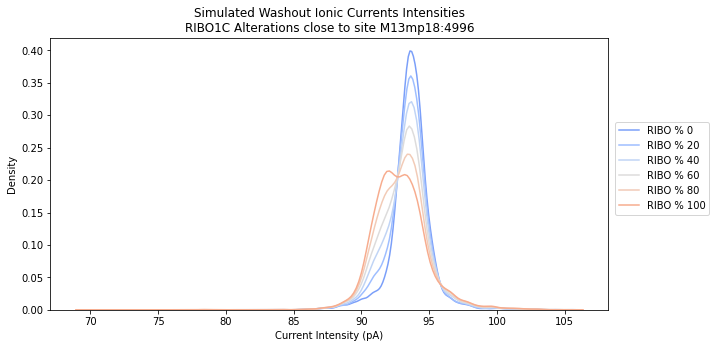

Processing Actual site: 5007 on altered position: M13mp18:5009
mix_dna_ribo_100_0 (8288, 8)
mix_dna_ribo_80_20 (8161, 8)
mix_dna_ribo_60_40 (7780, 8)
mix_dna_ribo_40_60 (7470, 8)
mix_dna_ribo_20_80 (7169, 8)
mix_dna_ribo_0_100 (6024, 8)


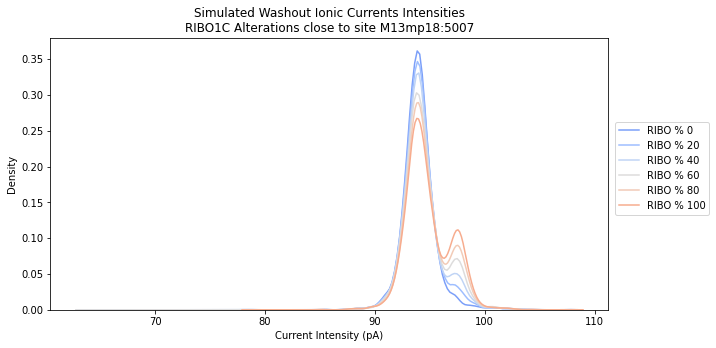

In [13]:
colors = plt.get_cmap('coolwarm')(np.linspace(0.2, 0.7, len(mixed_datasets.keys())))

for s_, as_ in zip(sites_curr, actual_sites):
    print(f"Processing Actual site: {as_} on altered position: M13mp18:{s_}")
    plt.figure(figsize=(10,5))
    for mix,color, perc in zip([f"mix_dna_ribo_{perc}_{100-perc}" for perc in [100,80,60,40,20,0]], colors, [100,80,60,40,20,0]):
        print(mix, mixed_datasets[mix].query(f"position == {s_}").shape)
        sn.kdeplot(data=mixed_datasets[mix].query(f"position == {s_}"), x="event_level_mean", label=f"RIBO % {100-perc}", color=color)
    plt.legend(bbox_to_anchor=(1.19, 0.71))
    plt.xlabel("Current Intensity (pA)")
    plt.title(f"Simulated Washout Ionic Currents Intensities\nRIBO1C Alterations close to site M13mp18:{as_}")
    # save image to disk
    plt.savefig(f"/lustre/bio_running/DNA_Ribo_2023/results/simulated_washout/sim_washout_DNA_vs_RIBO1C_site_M13mp18_{as_}.reverse.ionic_currents.tiff", 
                dpi=300, bbox_inches='tight', facecolor='white', transparent=False)
    plt.show()

Processing Actual site: 4996 on altered position: M13mp18:4993
Processing Actual site: 5007 on altered position: M13mp18:5009


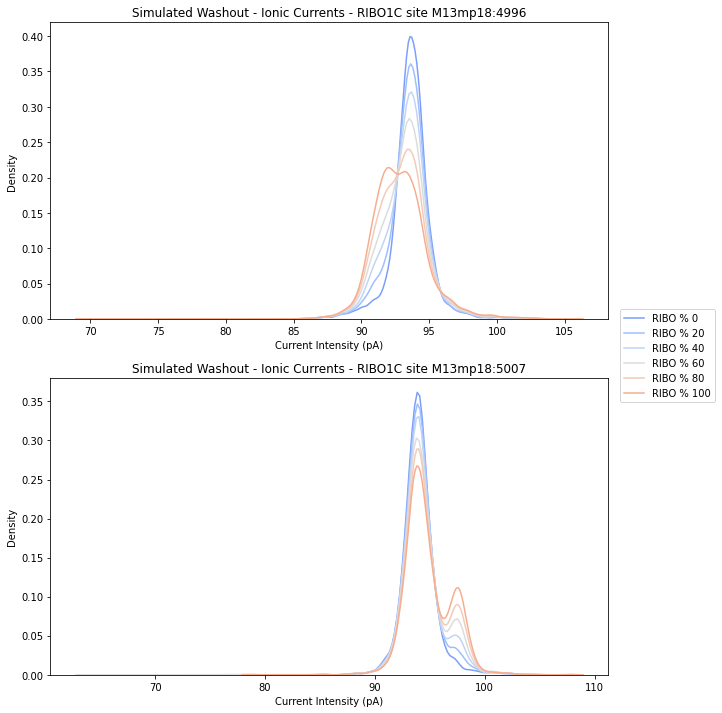

In [29]:
# produce a single plot for currents
colors = plt.get_cmap('coolwarm')(np.linspace(0.2, 0.7, len(mixed_datasets.keys())))

n_rows=2
n_cols=1
axes_pos = [i for i in range(n_rows)]
f, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10,12))
for s_, as_, ax_pos in zip(sites_curr, actual_sites, axes_pos):
    print(f"Processing Actual site: {as_} on altered position: M13mp18:{s_}")
    for mix,color, perc in zip([f"mix_dna_ribo_{perc}_{100-perc}" for perc in [100,80,60,40,20,0]], colors, [100,80,60,40,20,0]):
        #print(mix, mixed_datasets[mix].query(f"position == {s_}").shape)
        sn.kdeplot(data=mixed_datasets[mix].query(f"position == {s_}"), 
                   x="event_level_mean", 
                   label=f"RIBO % {100-perc}", 
                   color=color,
                   ax=axes[ax_pos])
    axes[ax_pos].set_xlabel("Current Intensity (pA)")
    axes[ax_pos].set_title(f"Simulated Washout - Ionic Currents - RIBO1C site M13mp18:{as_}")

plt.legend(bbox_to_anchor=(1.2, 1.25))
# save image to disk
plt.savefig(f"/lustre/bio_running/DNA_Ribo_2023/results/simulated_washout/sim_washout_DNA_vs_RIBO1C_site_M13mp18_all_contexts.reverse.ionic_currents.tiff", 
                dpi=300, bbox_inches='tight', facecolor='white', transparent=False)
plt.show()

### Dwell times

In [30]:
# define altered sites coordinates and its corresponding actual incorporation site for currents (1-based)
sites_curr = [4999, 5009]
actual_sites = [4996, 5007]

In [31]:
colors = plt.get_cmap('coolwarm')(np.linspace(0.2, 0.7, len(mixed_datasets.keys())))

# merge into uniq dataset
mixed_datasets_merged = []
for perc in [100,80,60,40,20,0]:
    mix = mixed_datasets[f"mix_dna_ribo_{perc}_{100-perc}"].copy()
    mix["RIBO_Perc"] = 100-perc
    mixed_datasets_merged.append(mix)
mixed_datasets_merged = pd.concat(mixed_datasets_merged).reset_index(drop=True)
mixed_datasets_merged

,contig,position,reference_kmer,read_name,event_level_mean,event_level_std,dwell,run,RIBO_Perc
0,M13mp18,4993,CGCGCA,00046ab2-a826-4168-a45c-1aedb540db77,94.828308,1.833814,13,DNA,0
1,M13mp18,4999,TTAAAG,00046ab2-a826-4168-a45c-1aedb540db77,100.292200,1.597808,4,DNA,0
2,M13mp18,5009,ATAGCC,00046ab2-a826-4168-a45c-1aedb540db77,94.527755,2.095942,11,DNA,0
3,M13mp18,4993,CGCGCA,0006f906-0472-4237-95ea-1fccab663392,93.921628,1.698862,18,DNA,0
4,M13mp18,4999,TTAAAG,0006f906-0472-4237-95ea-1fccab663392,98.595217,1.296829,6,DNA,0
...,...,...,...,...,...,...,...,...,...
153563,M13mp18,4993,CGCGCA,ffd48def-318a-488d-8435-9d5601dfb170,94.258489,1.146911,18,RIBO,100
153564,M13mp18,4999,TTAAAG,ffd48def-318a-488d-8435-9d5601dfb170,96.870788,2.081805,8,RIBO,100
153565,M13mp18,5009,ATAGCC,ffd48def-318a-488d-8435-9d5601dfb170,94.116709,0.861163,11,RIBO,100
153566,M13mp18,4993,CGCGCA,ffe3c7fe-2928-424f-b6a1-773e333d88c0,96.806300,3.594002,10,RIBO,100


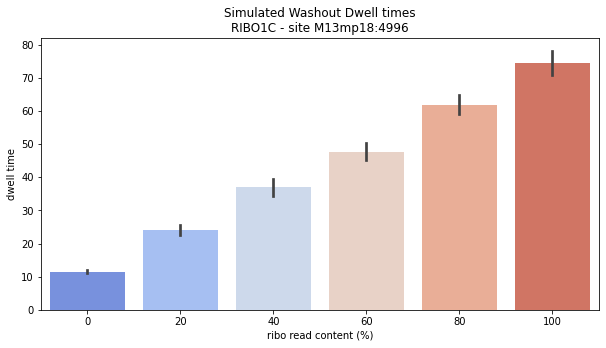

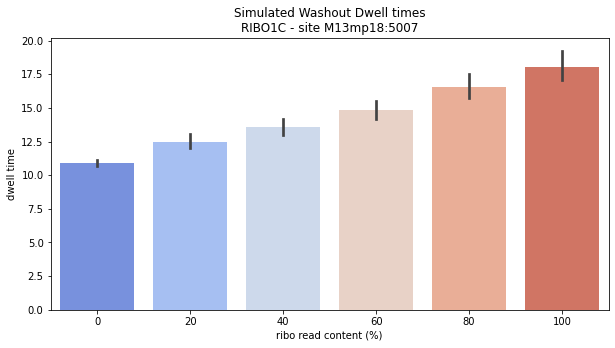

In [41]:
for s_, as_ in zip(sites_curr, actual_sites):
    plt.figure(figsize=(10,5))
    sn.barplot(data=mixed_datasets_merged.query(f"position == {s_}"), y="dwell", x="RIBO_Perc", palette="coolwarm")
    plt.ylabel("dwell time")
    plt.xlabel("ribo read content (%)")
    plt.title(f"Simulated Washout Dwell times\nRIBO1C - site M13mp18:{as_}")
    # save image to disk
    plt.savefig(f"/lustre/bio_running/DNA_Ribo_2023/results/simulated_washout/sim_washout_DNA_vs_RIBO1C_site_M13mp18_{as_}.reverse.dwell_times.tiff", 
                dpi=300, bbox_inches='tight', facecolor='white', transparent=False)
    plt.show()

In [ ]:
n_rows=2
n_cols=1
axes_pos = [i for i in range(n_rows)]
f, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10,12))
for s_, as_, ax_pos in zip(sites_curr, actual_sites, axes_pos):
    #plt.figure(figsize=(10,5))
    sn.barplot(data=mixed_datasets_merged.query(f"position == {s_}"), y="dwell", x="RIBO_Perc", 
                palette="coolwarm", ax=axes[ax_pos])
    axes[ax_pos].set_ylabel("dwell time")
    axes[ax_pos].set_xlabel("ribo read content (%)")
    axes[ax_pos].set_title(f"Simulated Washout Dwell times - RIBO1C site M13mp18:{as_}")

# save image to disk
plt.savefig(f"/lustre/bio_running/DNA_Ribo_2023/results/simulated_washout/sim_washout_DNA_vs_RIBO1C_site_M13mp18_all_contexts.reverse.dwell_times.tiff", 
                dpi=300, bbox_inches='tight', facecolor='white', transparent=False)
plt.show()